In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nbashots as nba # this will throw a warning if using matplotlib 1.5
from sklearn.datasets import make_blobs

%matplotlib inline

/home/youngdp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/youngdp/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
curry_id = nba.get_player_id("Curry, Stephen")[0]
curry_id

/home/youngdp/anaconda2/lib/python2.7/site-packages/nbashots/api.py:306: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


201939

In [3]:

# "shots" is the defualt paramter value
players_with_shots = nba.get_all_player_ids("shots")
players_with_shots.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST
0,1505,"Abdul-Wahad, Tariq"
1,949,"Abdur-Rahim, Shareef"
2,203518,"Abrines, Alex"
3,101165,"Acker, Alex"
4,203112,"Acy, Quincy"


In [4]:
players_with_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1587 entries, 0 to 1586
Data columns (total 2 columns):
PERSON_ID                   1587 non-null int64
DISPLAY_LAST_COMMA_FIRST    1587 non-null object
dtypes: int64(1), object(1)
memory usage: 24.9+ KB


In [5]:

all_data = nba.get_all_player_ids("all_data")
all_data.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


In [6]:

curry_logs = nba.PlayerLog(curry_id)

In [7]:
curry_logs.url_paramaters

{'LeagueID': '00',
 'PlayerID': 201939,
 'Season': '2016-17',
 'SeasonType': 'Regular Season'}

In [8]:
shots = nba.Shots()

In [9]:

curry_shots_df = nba.Shots(curry_id).get_shots()

In [10]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

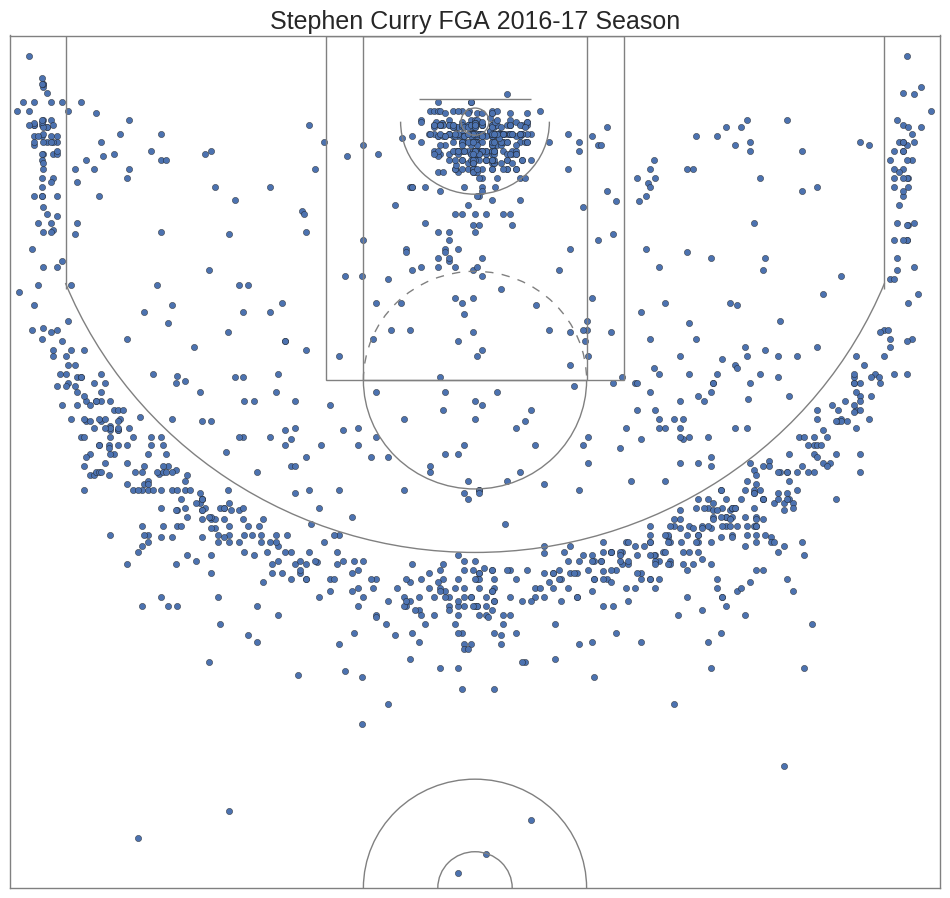

In [11]:
# Pass in Curry's FGA coordinates to shot_charts()
nba.shot_chart(curry_shots_df.LOC_X, curry_shots_df.LOC_Y,
              title="Stephen Curry FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [12]:
from sklearn.cluster import KMeans

In [13]:
curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())
print ""

In [14]:
X = curry_shots_df.LOC_X.to_frame().join(curry_shots_df.LOC_Y.to_frame())

In [15]:
X.head()

,LOC_X,LOC_Y
0,130,257
1,189,174
2,159,229
3,163,141
4,-9,267


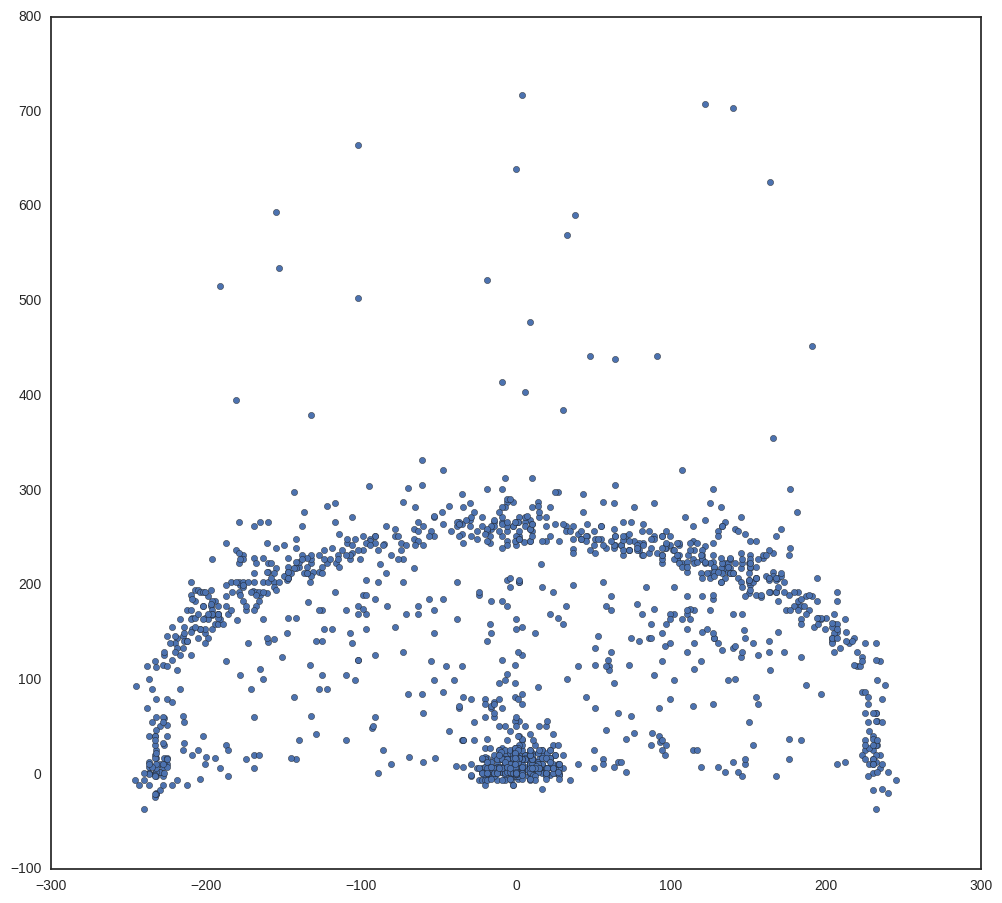

In [16]:
plt.scatter(X.LOC_X, X.LOC_Y)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

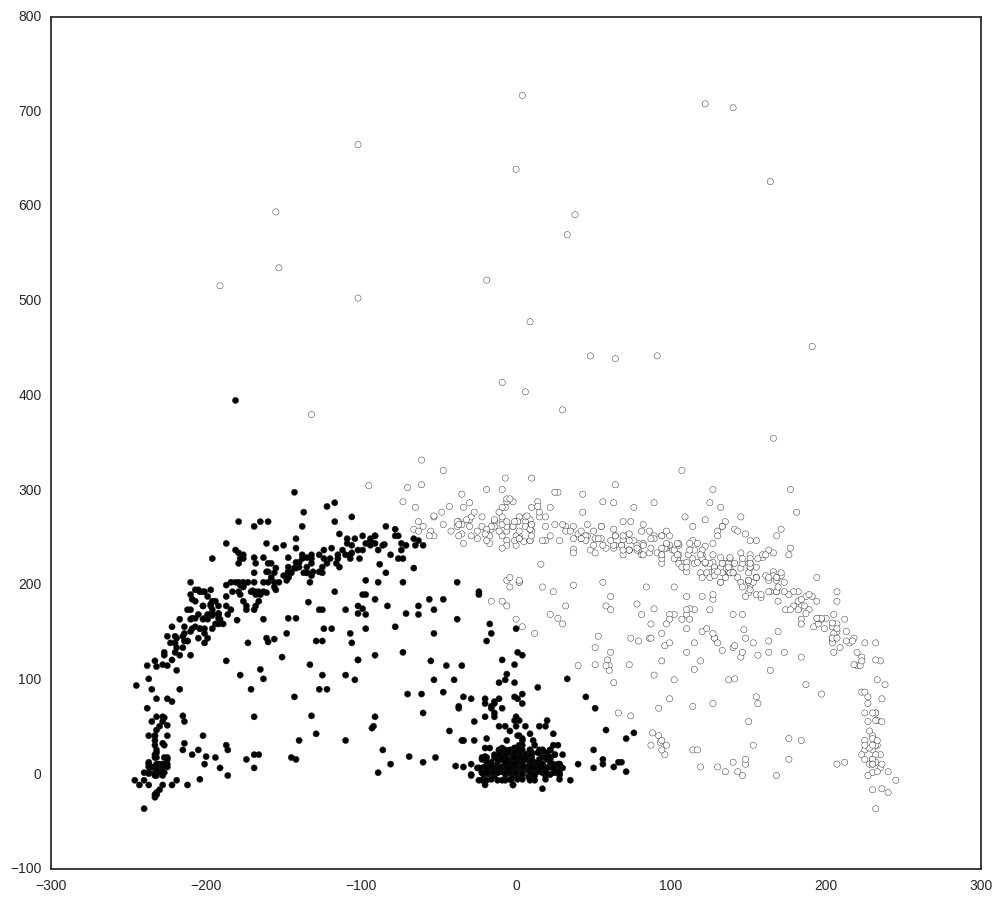

In [18]:
plt.scatter(X.LOC_X, X.LOC_Y, c=labels);
plt.show()

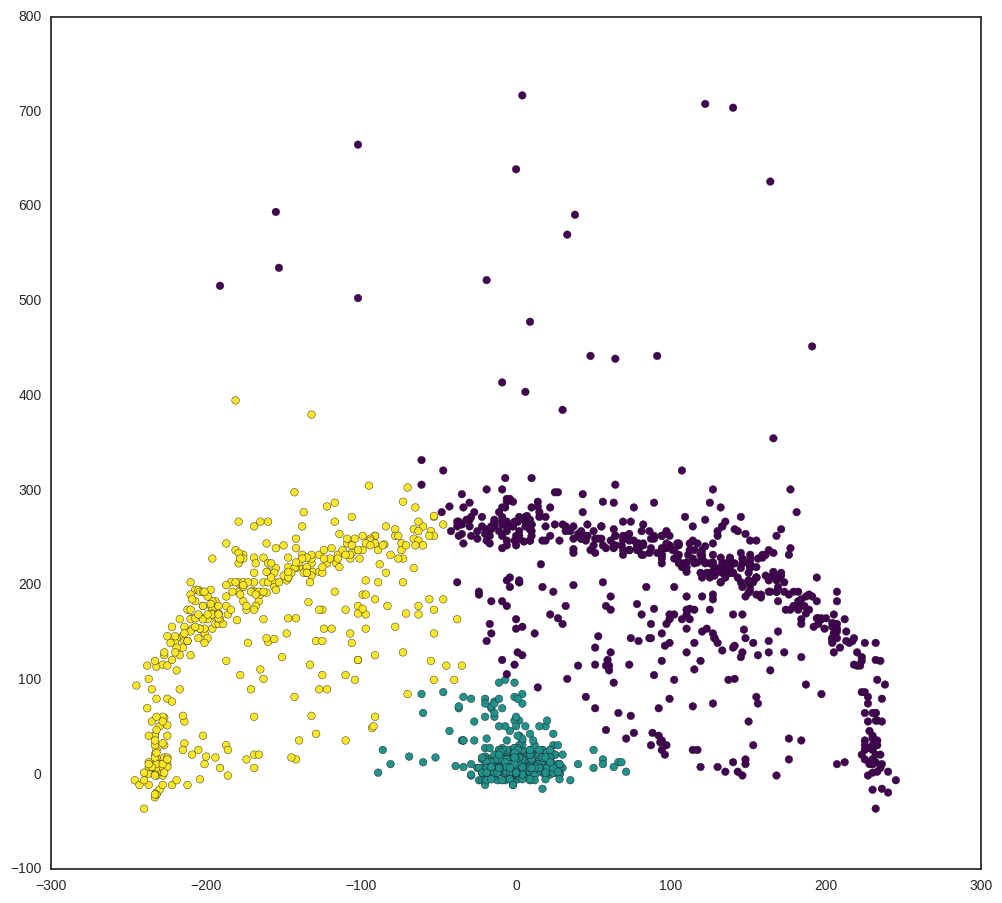

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=3,affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()


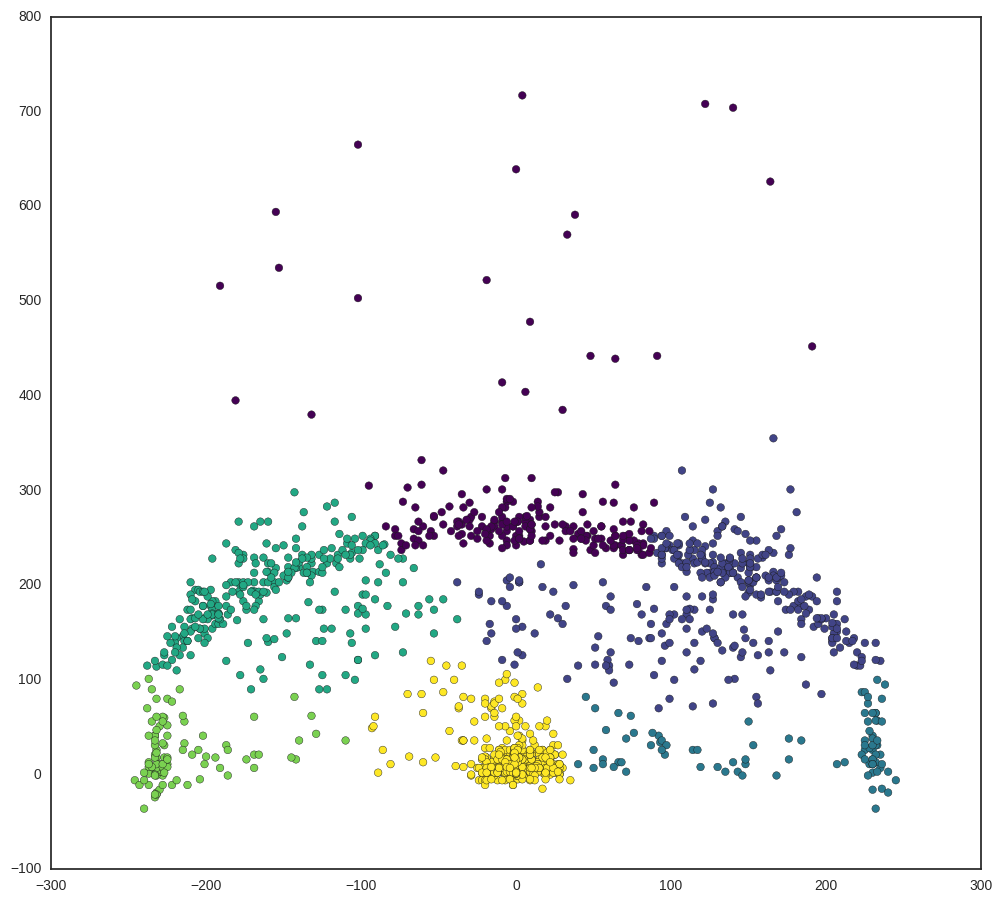

In [20]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(linkage="ward",
                                            connectivity=None,
                                            n_clusters=6)
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

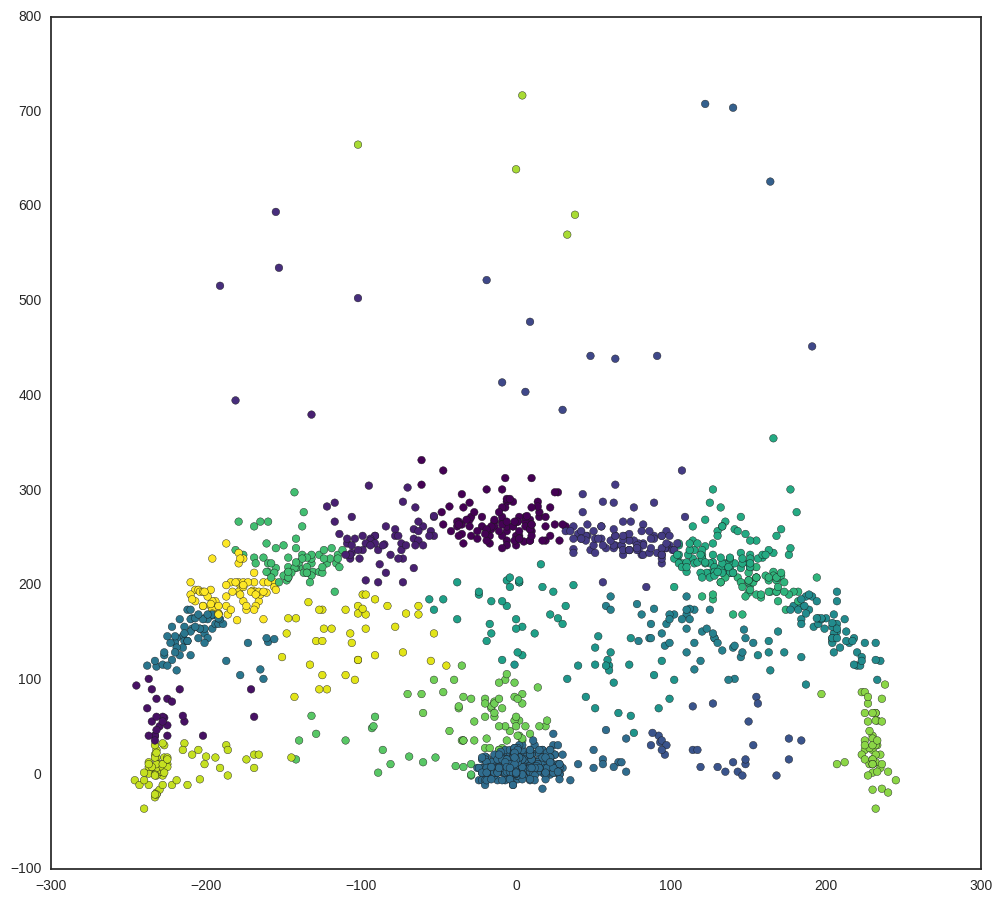

In [21]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation()
labels = model.fit_predict(X)
plt.scatter(X.LOC_X, X.LOC_Y, c=labels,
            s=30, cmap='viridis');
plt.show()

/home/youngdp/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:418: UserWarning: the number of connected components of the connectivity matrix is 8 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)
/home/youngdp/anaconda2/lib/python2.7/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 8 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


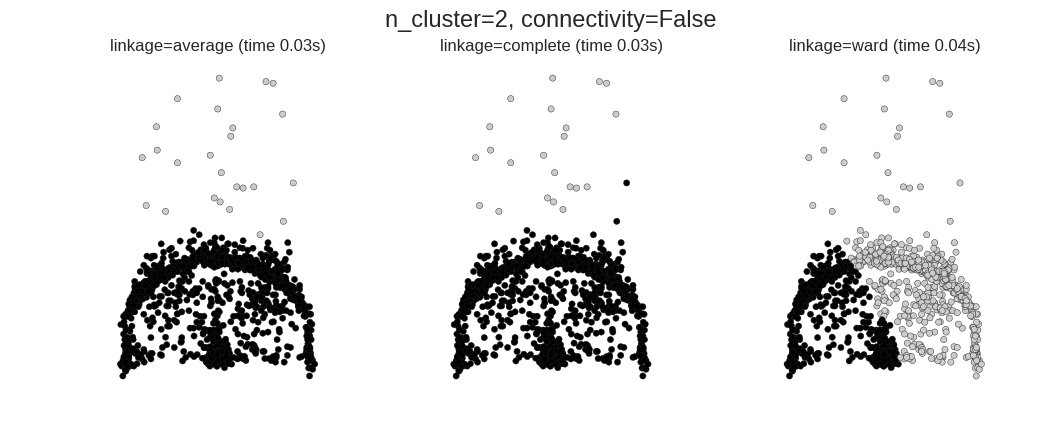

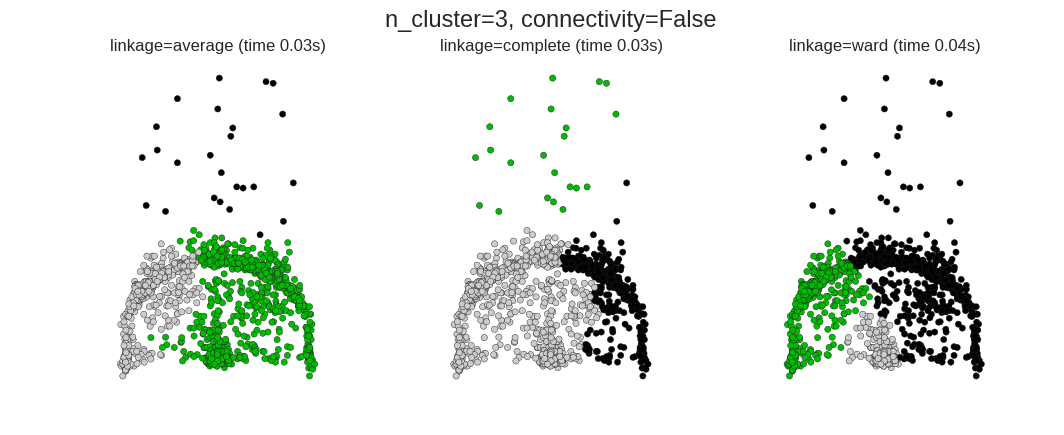

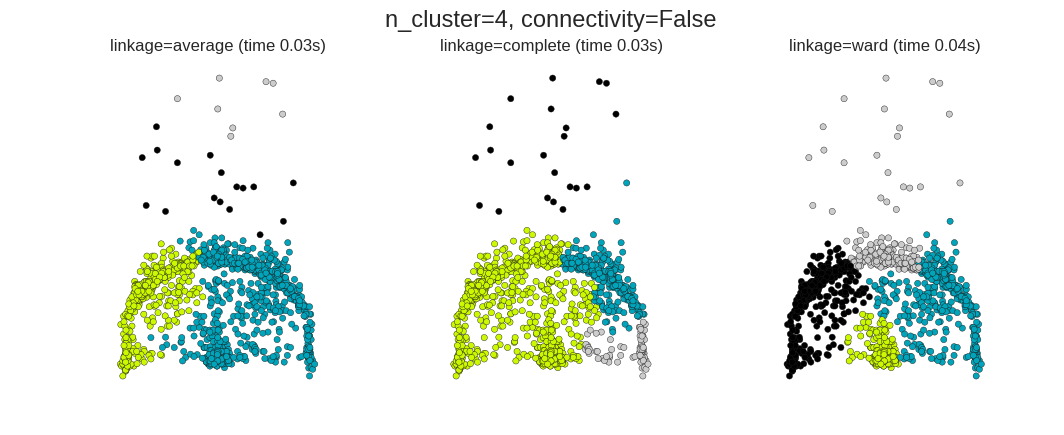

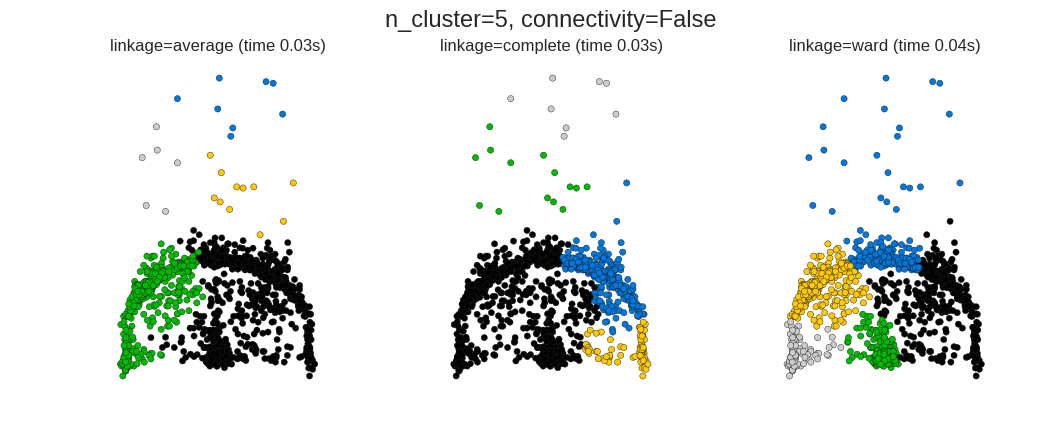

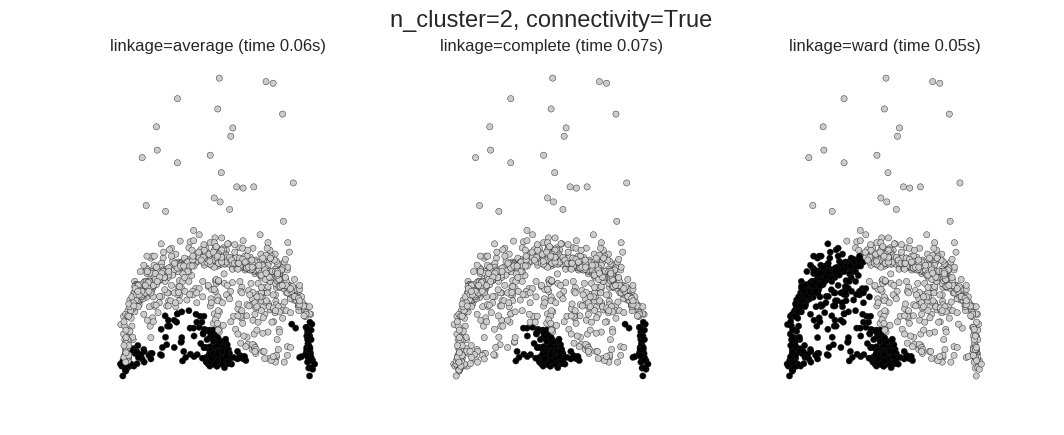

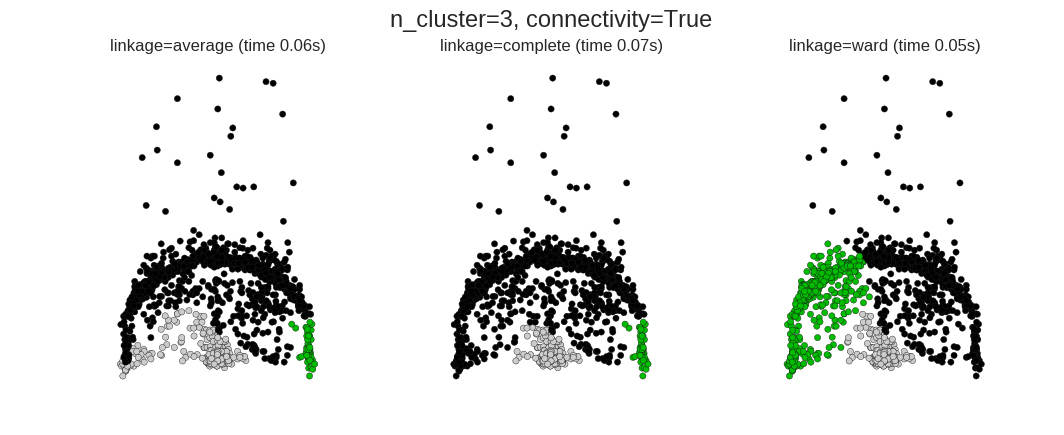

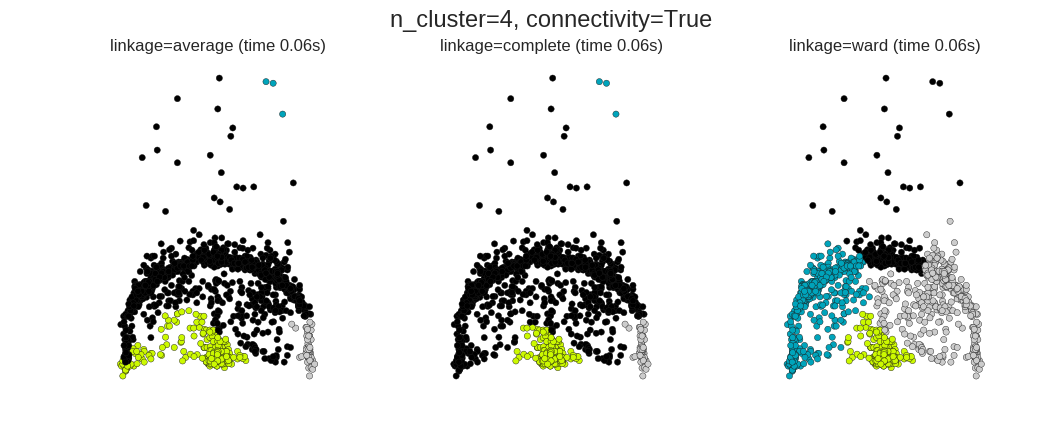

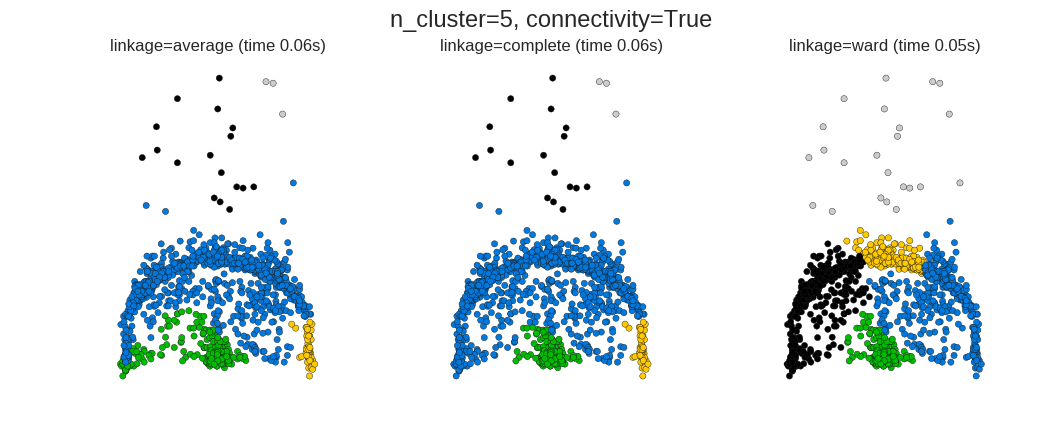

In [22]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 3, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X.LOC_X, X.LOC_Y, c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()


In [23]:
"""
What is the purpose of clustering the map of Curry's shots? 
"""



"\nWhat is the purpose of clustering the map of Curry's shots? \n"

In [27]:
westbrook_id = nba.get_player_id("Westbrook, Russell")[0]
westbrook_id

201566

In [28]:
westbrook_shots_df = nba.Shots(westbrook_id).get_shots()

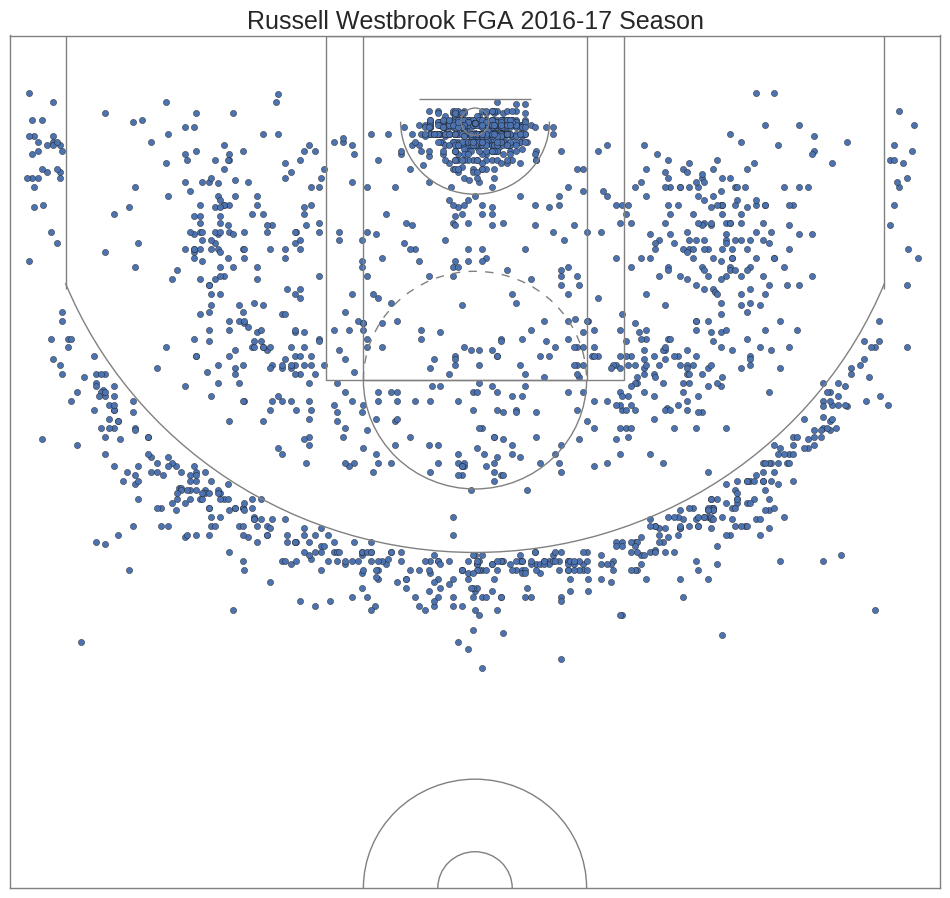

In [29]:
nba.shot_chart(westbrook_shots_df.LOC_X, westbrook_shots_df.LOC_Y,
              title="Russell Westbrook FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [32]:
combined_shots_df = curry_shots_df + westbrook_shots_df

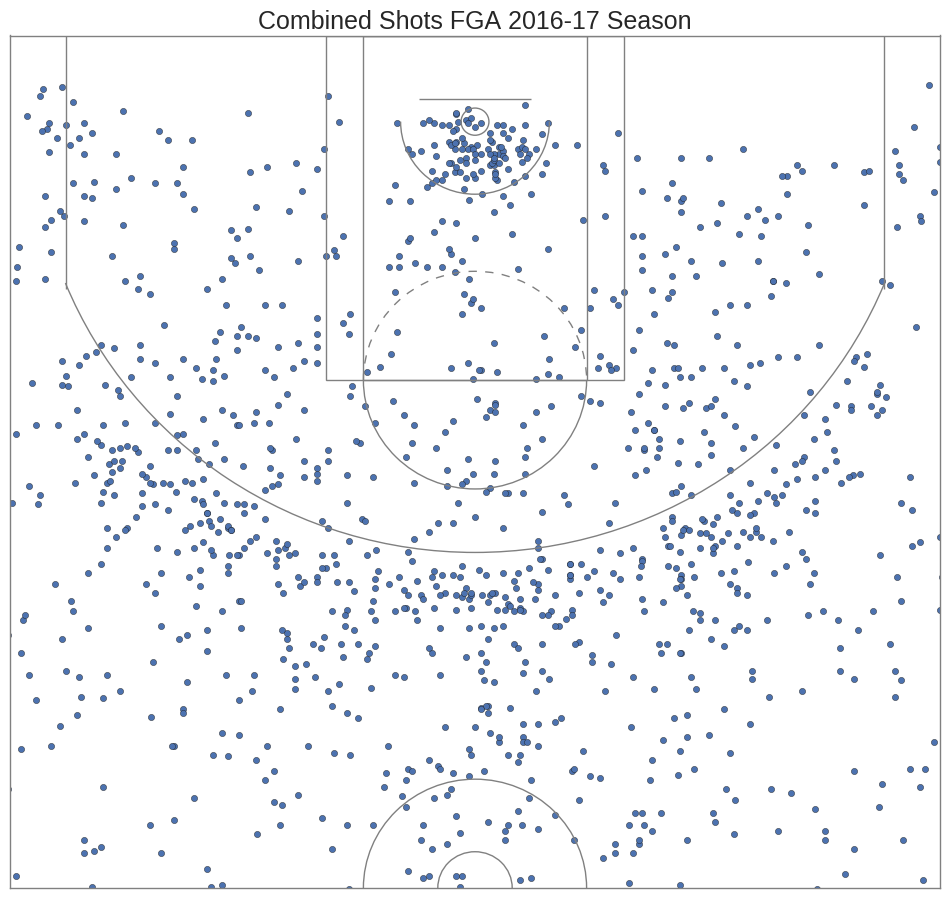

In [33]:
nba.shot_chart(combined_shots_df.LOC_X, combined_shots_df.LOC_Y,
              title="Combined Shots FGA 2016-17 Season")

# lebron_id = nba.get_player_id("Curry,Stephen")[0]
# lebron_shots = nba.Shots(curry_id).get_shots()

plt.show()

In [36]:
X = combined_shots_df.LOC_X.to_frame().join(combined_shots_df.LOC_Y.to_frame())
X.head()

,LOC_X,LOC_Y
0,304.0,293.0
1,72.0,261.0
2,101.0,265.0
3,-20.0,221.0
4,-29.0,261.0


In [35]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 3, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (2,3,4,5):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X.LOC_X, X.LOC_Y, c=model.labels_,
                        cmap=plt.cm.spectral)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').